In [1]:
import scvelo as scv
import numpy as np
import pandas as pd

import scanpy as sc

In [2]:
adata = scv.datasets.pancreas()


In [3]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)


# Builtin HVG

In [ ]:
# adata.var['highly_variable_genes']

In [ ]:
# actual_mask = adata.var['highly_variable_genes'] == "True"

In [ ]:
# filtered = adata[:,actual_mask]

In [ ]:
# WHY IS VARIABILITY A MIXTURE OF BOOL STRINGS AND NANS? JFC
# filtered

# Foreign HVG

In [4]:
hvg = np.loadtxt("./ZPSGenes.tsv",dtype=str)
hvg.shape

(1352,)

In [5]:
filtered = adata[:,hvg]

### Let's just double check real quick if there was even minimal sanity when doing the hv selection

In [ ]:
sc.pp.highly_variable_genes(adata,n_top_genes=4004)
adata.var['highly_variable']

In [ ]:
sc_calls = adata.var_names[adata.var['highly_variable']]
foreign_calls = adata.var_names[actual_mask]

In [ ]:
np.sum(actual_mask.astype(dtype=int))

In [ ]:
len(set(sc_calls).intersection(set(foreign_calls)))

# Vignette Analysis

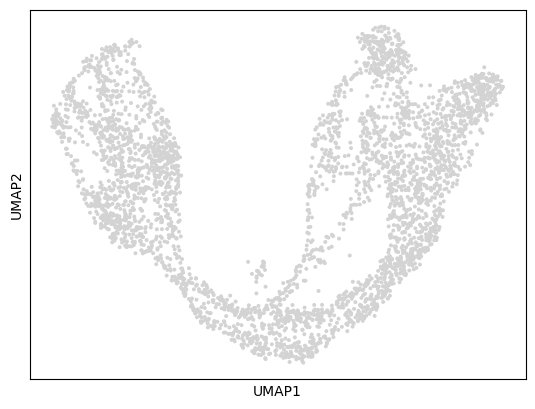

In [14]:
# sc.pp.neighbors(filtered)
# sc.tl.umap(filtered)
# sc.pl.umap(filtered)

In [13]:
filtered.obsm['X_umap'] = u_t

In [15]:
scv.pp.moments(filtered,n_neighbors=None,n_pcs=None)

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [19]:
scv.tl.velocity(filtered)
scv.tl.velocity_graph(filtered)


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


/Users/bbrener1/miniconda3/envs/forecaster/lib/python3.11/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/bbrener1/miniconda3/envs/forecaster/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/bbrener1/miniconda3/envs/forecaster/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/bbrener1/miniconda3/envs/forecaster/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/bbrener1/miniconda3/envs/fo

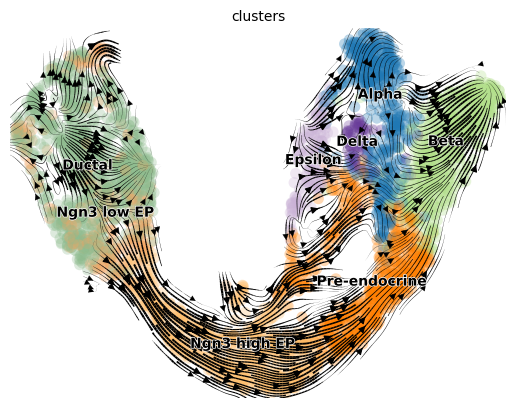

In [20]:
scv.pl.velocity_embedding_stream(filtered, density=5, basis='umap')

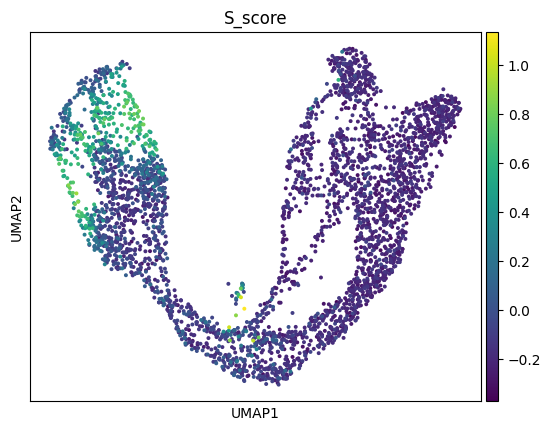

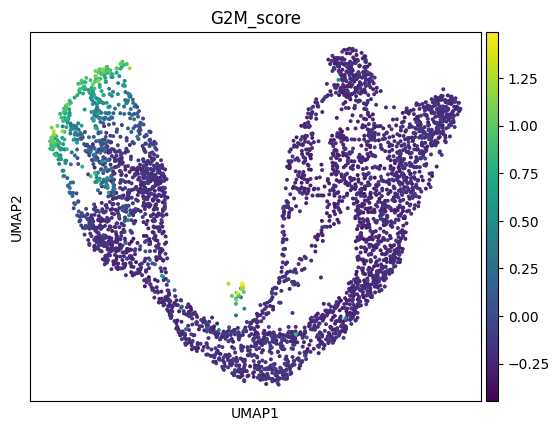

In [21]:
sc.pl.umap(filtered,color="S_score")
sc.pl.umap(filtered,color="G2M_score")

In [8]:
import matplotlib.pyplot as plt 

In [9]:
from umap import UMAP
from sklearn.decomposition import PCA

In [26]:
pca_model = PCA(n_components=50)
pca = pca_model.fit_transform(np.array(filtered.X.todense()))

umap_model = UMAP(n_neighbors=15,min_dist=0.5, spread=1.0, n_components=2, negative_sample_rate=5, random_state=0,metric='cosine')
u_t = umap_model.fit_transform(pca)

In [11]:
u_t.shape

(3696, 2)

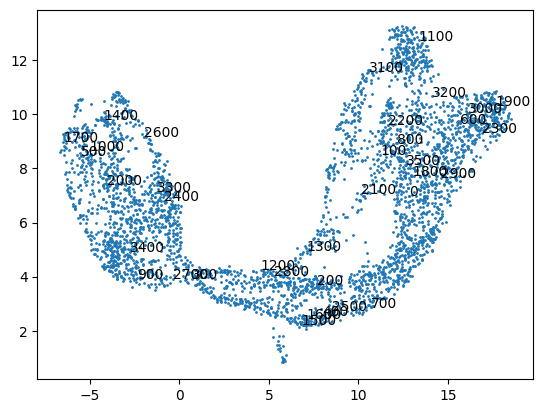

In [27]:
plt.figure()
plt.scatter(*u_t.T,s=1)
for i in range(0,3600,100):
    plt.text(*u_t[i],f"{i}",)
plt.show()

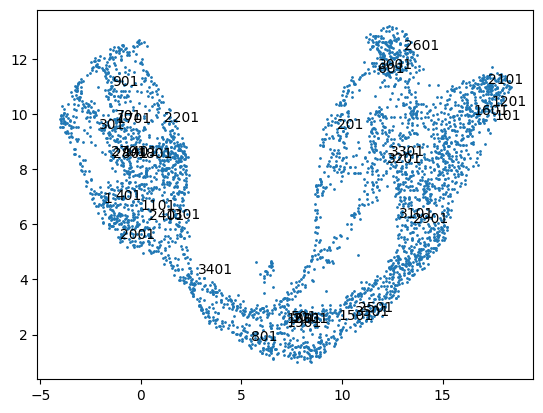

In [33]:
plt.figure()
plt.scatter(*filtered.obsm['X_umap'].T,s=1)
for i in range(1,3601,100):
    plt.text(*filtered.obsm['X_umap'][i],f"{i}")
plt.show()

In [47]:
trajectories = np.loadtxt("./trajectories_1700.tsv",dtype=float)
trajectories.shape

(1352, 50)

In [48]:
pca_transformed_trajectories = pca_model.transform(trajectories.T)
pca_transformed_trajectories.shape

(50, 50)

In [49]:
embedded = umap_model.transform(pca_transformed_trajectories)
embedded.shape

(50, 2)

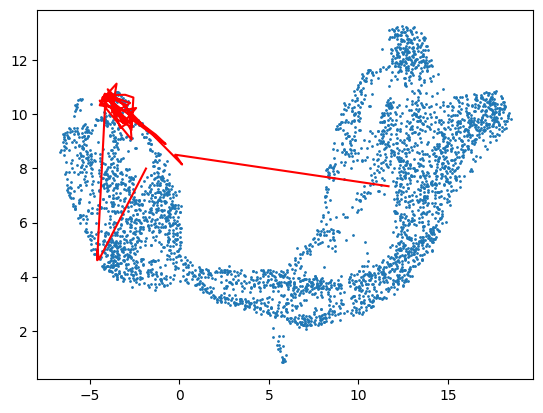

In [50]:
plt.figure()
plt.scatter(*u_t.T,s=1)
plt.plot(*embedded[:50].T,color='red')
plt.show()

In [ ]:
trajectories = trajectories.reshape((1352,2,50))

In [ ]:
trajectories